In [1]:
import os
import re
import json
import gzip
import numpy as np
import pandas as pd
from urllib.request import urlopen

In [2]:
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [3]:
# df = getDF('/data/zyang/datasets/amazon_book/Books_5.json.gz')
df = getDF('/data/yuqihang/datasets/recsys/Amazon/2018/Books.json.gz')

In [4]:
df.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,False,"08 12, 2005",A1C6M8LCIX4M6M,0001713353,{'Format:': ' Paperback'},June Bug,This book is a winner with both of my boys. T...,Children's favorite,1123804800,NaN,NaN
1,5.0,False,"03 30, 2005",A1REUF3A1YCPHM,0001713353,{'Format:': ' Hardcover'},TW Ervin II,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from,1112140800,NaN,NaN


In [5]:
metadata = []
with gzip.open('/data/yuqihang/datasets/recsys/Amazon/2018/meta_Books.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))

In [6]:
# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
print(metadata[0])

# convert list into pandas dataframe

df_meta = pd.DataFrame.from_dict(metadata)

print(len(df_meta))

2934949
{'category': [], 'tech1': '', 'description': ['It is a biology book with God&apos;s perspective.'], 'fit': '', 'title': 'Biology Gods Living Creation Third Edition 10 (A Beka Book Science Series)', 'also_buy': ['0669009075', 'B000K2P5SA', 'B00MD4G2N0', 'B000ASIPTK', '0130508470', '1892427524', '0321567919', 'B000BJBH20', '0547484631', 'B000HAJTQO', 'B000AUCX7I', '0130365645', 'B000BI1Y2O', '0395976715', '052817729X', '1579246443', 'B001CK63XK', '1591669847', '0395879884', '836585161X', 'B01J2F9BH6', 'B00KYEHR4E', '158008141X', '1857928393', '0927545829', 'B015AR0RA0', 'B000TVHHRE', '0865167990', '1579246052', 'B003NXXVD4', 'B000OH6AX0', '061802087X', 'B000NU2X02', '0743252012'], 'tech2': '', 'brand': 'Keith Graham', 'feature': [], 'rank': '1,349,781 in Books (', 'also_view': ['0019777701', 'B000AUCX7I', 'B000K2P5SA', 'B001CK63XK', 'B01J2F9BH6', 'B000BI1Y2O', '1932012540', 'B0095ZCRCK'], 'main_cat': 'Books', 'similar_item': '', 'date': '', 'price': '$39.94', 'asin': '0000092878'

In [7]:
df_meta.head(5)

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[It is a biology book with God&apos;s perspect...,,Biology Gods Living Creation Third Edition 10 ...,"[0669009075, B000K2P5SA, B00MD4G2N0, B000ASIPT...",,Keith Graham,[],"1,349,781 in Books (","[0019777701, B000AUCX7I, B000K2P5SA, B001CK63X...",Books,,,$39.94,0000092878,[],[],NaN
1,"[Books, New, Used & Rental Textbooks, Medicine...",,[],,Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp,[],"1,702,625 in Books (","[B01MUCYEV7, B01KUGTY6O]",Books,,,,000047715X,[],[],NaN
2,"[Books, Arts & Photography, Music]",,"[Discography of American Punk, Hardcore, and P...",,"Flex! Discography of North American Punk, Hard...",[],,Burkhard Jarisch,[],"6,291,012 in Books (",[],Books,,,$199.99,0000004545,[],[],NaN
3,"[Books, Arts & Photography, Music]",,[This is a collection of classic gospel hymns ...,,Heavenly Highway Hymns: Shaped-Note Hymnal,[],,Stamps/Baxter,[],"2,384,057 in Books (","[0006180116, 0996092730, B000QFOGY0, B06WWKNDL...",Books,,,,0000013765,[],[],NaN
4,[],,[],,Georgina Goodman Nelson Womens Size 8.5 Purple...,[],,,[],"11,735,726 in Books (",[],Books,,,$164.10,0000000116,[],[],NaN


In [8]:
df3 = df_meta.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
2934949


In [9]:
# df['rating'].dropna().describe()
df['overall'].dropna().describe()

count    5.131162e+07
mean     4.393247e+00
std      1.045411e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [10]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [11]:
rating = df[['asin','reviewerID','overall','unixReviewTime']]
# rating = df[['rating','timestamp','user_id','asin','helpful_vote']]
rating.head(2) 

,asin,reviewerID,overall,unixReviewTime
0,0001713353,A1C6M8LCIX4M6M,5.0,1123804800
1,0001713353,A1REUF3A1YCPHM,5.0,1112140800


In [12]:
rating['overall'].describe()

count    5.131162e+07
mean     4.393247e+00
std      1.045411e+00
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [13]:
# rating = rating[['asin','reviewerID','overall','unixReviewTime']]
# rating = rating[['asin','user_id','rating','timestamp']]
rating.columns = ['asin','user','rating','timestamp']

In [14]:
df5.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [15]:
# meta_data = df5[['asin','category','title','brand','price']]
meta_data = df5[['asin','category','title','description','price','brand']]
# meta_data.columns = ['asin','category','title','brand','price']
meta_data.head(2)

,asin,category,title,description,price,brand
0,0000092878,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham
1,000047715X,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp


In [16]:
meta_data.shape

(2934949, 6)

In [17]:
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

/tmp/ipykernel_2758201/2482686894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
/tmp/ipykernel_2758201/2482686894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_data['title'] = meta_data['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))


In [18]:
meta_data = meta_data.drop_duplicates(subset=['asin'],keep='last')
# meta_data = meta_data.drop_duplicates(subset=['title'],keep='last')
meta_data.shape

(2815506, 6)

In [26]:
len(set(meta_data['title']))

2815506

In [19]:
meta_data.head(2)

,asin,category,title,description,price,brand
0,0000092878,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham
1,000047715X,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp


In [20]:
data = rating.merge(meta_data,on='asin',how='right')

In [21]:
data.head(2)

,asin,user,rating,timestamp,category,title,description,price,brand
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham


In [22]:
data.shape

(47059306, 9)

In [23]:
data.dropna(subset=['user'], inplace=True)
data.dropna(subset=['asin'], inplace=True)
data.dropna(subset=['title'], inplace=True)
data.dropna(subset=['timestamp'], inplace=True)

In [24]:
data.shape

(47059165, 9)

In [25]:
data.head()

,asin,user,rating,timestamp,category,title,description,price,brand
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,[],Biology Gods Living Creation Third Edition 10 ...,[It is a biology book with God&apos;s perspect...,$39.94,Keith Graham
2,000047715X,ASS457AQPDIFZ,5.0,1.409443e+09,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp
3,000047715X,A3NMH1KTLG7CWX,5.0,1.398816e+09,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp
4,000047715X,A2LI5026JCXQBA,4.0,1.398730e+09,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,[],,Acp


In [27]:
#查看title列数据类型
type(data['category'][0]),type(data['description'][0]),type(data['title'][0]),type(data['price'][0]),type(data['brand'][0])

(list, list, str, str, str)

In [28]:
data['description'] = data['description'].apply(lambda x: ', '.join(x) if x else '')
data['category'] = data['category'].apply(lambda x: ', '.join(x[1:]) if x else '')

In [29]:
data.head(5)

,asin,user,rating,timestamp,category,title,description,price,brand
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham
2,000047715X,ASS457AQPDIFZ,5.0,1.409443e+09,"Books, New, Used & Rental Textbooks, Medicine ...",Mksap 16 Audio Companion: Medical Knowledge Se...,,,Acp
3,000047715X,A3NMH1KTLG7CWX,5.0,1.398816e+09,"Books, New, Used & Rental Textbooks, Medicine ...",Mksap 16 Audio Companion: Medical Knowledge Se...,,,Acp
4,000047715X,A2LI5026JCXQBA,4.0,1.398730e+09,"Books, New, Used & Rental Textbooks, Medicine ...",Mksap 16 Audio Companion: Medical Knowledge Se...,,,Acp


In [30]:
rating_ = data.copy()
rating_.head(2)

,asin,user,rating,timestamp,category,title,description,price,brand
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham


In [31]:
rating_.columns = ['iid','uid','rating','timestamp','category','title','description','price','brand']
rating_.head(2)

,iid,uid,rating,timestamp,category,title,description,price,brand
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham


In [32]:
date_min = pd.to_datetime(rating_.timestamp,unit='s').min()
date_max = pd.to_datetime(rating_.timestamp,unit='s').max()
date_min,date_max

(Timestamp('1996-05-20 00:00:00'), Timestamp('2018-10-02 00:00:00'))

In [34]:
rating_.shape

(47059165, 9)

In [33]:
date_gap = (date_max-date_min)//(19*2)
date_gap

Timedelta('215 days 00:00:00')

In [35]:
rating_['time'] = pd.to_datetime(rating_.timestamp, unit='s').map(lambda x: x.year )

In [44]:
rating_.head(2)

,iid,uid,rating,timestamp,category,title,description,price,brand,time
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham,2015
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,$39.94,Keith Graham,2015


In [45]:
import numpy as np
np.sort(rating_.time.unique())

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [36]:
rating_.uid.unique().shape, rating_.iid.unique().shape

((14686755,), (2815365,))

In [37]:
rating_ = rating_[['iid','uid','rating','timestamp','title','description','category','price','brand','time']]

In [33]:
# rating_['length'] = rating_['description'].apply(lambda x: len(x.split()))

In [38]:
rating_.head()

,iid,uid,rating,timestamp,title,description,category,price,brand,time
0,0000092878,A1WL6RUI44BF5R,5.0,1.443830e+09,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,,$39.94,Keith Graham,2015
1,0000092878,A7O68FOES8807,5.0,1.438128e+09,Biology Gods Living Creation Third Edition 10 ...,It is a biology book with God&apos;s perspective.,,$39.94,Keith Graham,2015
2,000047715X,ASS457AQPDIFZ,5.0,1.409443e+09,Mksap 16 Audio Companion: Medical Knowledge Se...,,"Books, New, Used & Rental Textbooks, Medicine ...",,Acp,2014
3,000047715X,A3NMH1KTLG7CWX,5.0,1.398816e+09,Mksap 16 Audio Companion: Medical Knowledge Se...,,"Books, New, Used & Rental Textbooks, Medicine ...",,Acp,2014
4,000047715X,A2LI5026JCXQBA,4.0,1.398730e+09,Mksap 16 Audio Companion: Medical Knowledge Se...,,"Books, New, Used & Rental Textbooks, Medicine ...",,Acp,2014


In [35]:
# rating__ = rating_[rating_['length'] > 15]

In [36]:
# rating__ = rating__[rating__['length'] < 500]

In [50]:
# rating__.length.describe()

NameError: name 'rating__' is not defined

In [39]:
rating__ = rating_.copy()

In [40]:
s_rating = rating__[rating__.time.isin([2017])].copy()
s_rating['time'] = pd.to_datetime(s_rating.timestamp, unit='s').map(lambda x: x.month)
s_rating = s_rating[s_rating.time.isin(range(1,13))]

In [41]:
s_rating.shape

(6794797, 10)

In [32]:
s_rating.shape

(7281147, 9)

In [62]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.189901e+06
mean,2.134410e+00
std,5.878166e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.188000e+03


In [33]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,3.330909e+06
mean,2.185934e+00
std,6.108465e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,2.000000e+00
max,1.294000e+03


In [42]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})

In [43]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((54305,), (22856,))

In [41]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((68023,), (24291,))

In [44]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(763389, 10)

In [36]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(845689, 9)

In [45]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    33.651708
 dtype: float64,
 rating    16.2223
 dtype: float64)

In [37]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    34.018061
 dtype: float64,
 rating    16.628436
 dtype: float64)

In [46]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((763389, 10), (22685,), (47058,))

In [38]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((845689, 9), (24860,), (50858,))

In [47]:
s_rating = s_rating.reset_index()
s_rating.head(2)

,index,iid,uid,rating,timestamp,title,description,category,price,brand,time
0,267,0001050230,A2SLME0E0ENFCP,5.0,1.514678e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature & Fiction, Dramas & Plays",$20.93,Visit Amazon's William Shakespeare Page,12
1,271,0001050230,A2RTH3REZ7YEDB,5.0,1.513642e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature & Fiction, Dramas & Plays",$20.93,Visit Amazon's William Shakespeare Page,12


<Axes: xlabel='time'>

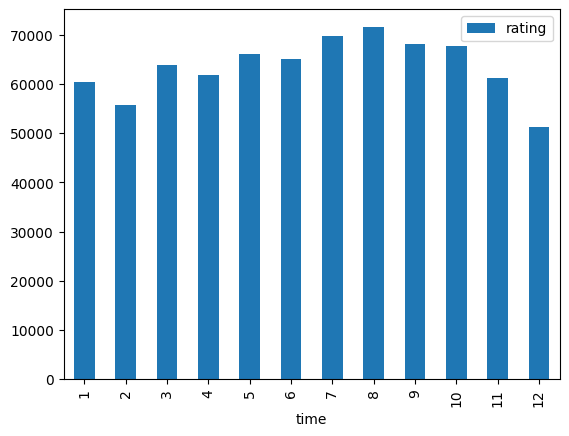

In [48]:
s_rating.groupby('time').agg({'rating':'count'}).reset_index().plot(x='time',kind='bar')

In [49]:
s_rating.rating.unique()

array([5., 4., 3., 2., 1.])

In [50]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    763389.000000
mean          0.633537
std           0.481838
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [42]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    845689.00000
mean          0.63175
std           0.48233
min           0.00000
25%           0.00000
50%           1.00000
75%           1.00000
max           1.00000
Name: label, dtype: float64

In [51]:
users = s_rating.uid.unique()
items = s_rating.iid.unique()
users_map = dict(zip(users, np.arange(users.shape[0])+1))
items_map = dict(zip(items, np.arange(items.shape[0])+1))
s_rating['uid'] = s_rating['uid'].map(users_map)
s_rating['iid'] = s_rating['iid'].map(items_map)
s_rating.uid.max(), s_rating.iid.max()

(22685, 47058)

In [52]:
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['description'] = s_rating['description'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['title'] = s_rating['title'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['category'] = s_rating['category'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'<[^>]+>', ' ', x.replace('&','')))
s_rating['brand'] = s_rating['brand'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))
s_rating['price'] = s_rating['price'].apply(lambda x: re.sub(r'\s+', ' ', x.strip()))

In [53]:
s_rating.head()

,index,iid,uid,rating,timestamp,title,description,category,price,brand,time,label
0,267,1,1,5.0,1.514678e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature Fiction, Dramas Plays",$20.93,Visit Amazon's William Shakespeare Page,12,1
1,271,1,2,5.0,1.513642e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature Fiction, Dramas Plays",$20.93,Visit Amazon's William Shakespeare Page,12,1
2,283,1,3,4.0,1.512518e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature Fiction, Dramas Plays",$20.93,Visit Amazon's William Shakespeare Page,12,0
3,284,1,3,4.0,1.512518e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature Fiction, Dramas Plays",$20.93,Visit Amazon's William Shakespeare Page,12,0
4,285,1,4,5.0,1.512346e+09,Love's Labour's Lost: Performed by Derek Jacob...,William Shakespeare is widely regarded as the ...,"Books, Literature Fiction, Dramas Plays",$20.93,Visit Amazon's William Shakespeare Page,12,1


In [54]:
s_rating.tail()

,index,iid,uid,rating,timestamp,title,description,category,price,brand,time,label
763384,47059237,47058,16137,4.0,1.490141e+09,The Seance (Jinn Series Book 1) eBook,,"Books, Literature Fiction, Genre Fiction",,Visit Amazon's Ayse Hafiza Page,3,0
763385,47059240,47058,3899,3.0,1.499213e+09,The Seance (Jinn Series Book 1) eBook,,"Books, Literature Fiction, Genre Fiction",,Visit Amazon's Ayse Hafiza Page,7,0
763386,47059241,47058,3069,3.0,1.498435e+09,The Seance (Jinn Series Book 1) eBook,,"Books, Literature Fiction, Genre Fiction",,Visit Amazon's Ayse Hafiza Page,6,0
763387,47059242,47058,7745,4.0,1.498262e+09,The Seance (Jinn Series Book 1) eBook,,"Books, Literature Fiction, Genre Fiction",,Visit Amazon's Ayse Hafiza Page,6,0
763388,47059247,47058,16642,5.0,1.493165e+09,The Seance (Jinn Series Book 1) eBook,,"Books, Literature Fiction, Genre Fiction",,Visit Amazon's Ayse Hafiza Page,4,1


In [55]:
s_rating.iid.unique().shape

(47058,)

In [57]:
id2title = {}
# title2id = {}
for i in range(len(s_rating)):
    iid = int(s_rating.iloc[i]['iid'])
    title = str(s_rating.iloc[i]['title'])
    description = str(s_rating.iloc[i]['description'])
    category = str(s_rating.iloc[i]['category'])
    brand = str(s_rating.iloc[i]['brand'])
    price = str(s_rating.iloc[i]['price'])
    if iid not in id2title:
        id2title[iid] = {
            'title':title,
            'description':description,
            'category':category,
            'brand':brand,
            'price':price,
            }
    # if title not in title2id:
    #     title2id[title] = {
    #         'id':iid,
    #         'description':description,
    #         'category':category,
    #         'brand':brand,
    #         'price':price,
    #         }
print(len(id2title.keys()))
# print(len(id2title.keys()),len(title2id.keys()))


47058 47058


In [58]:
#保存为字典 id2title 为 json 文件
import json
json_dir = '/home/yuqihang/projects/CoLLM/collm-datasets/bookdu'
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)
# json.dump(title2id, open(f"{json_dir}/title2id.json", "w"), indent=4)

In [62]:
with open('/home/yuqihang/projects/CoLLM/collm-datasets/booknew/id2keywords.json','r') as f:
    id2keywords = json.load(f)

In [71]:
for idx,meta in id2title.items():
    try:
        meta['keywords'] = id2keywords[idx]['keywords']
    except:
        print(f'can\'t find {idx} in id2keywords')
    id2title[idx] = meta

In [72]:
json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [73]:
# id2title = {}
# for title,meta in title2id.items():
#     idx = meta['id']
#     del meta['id']
#     meta['title'] = title
#     id2title[idx] = meta

In [74]:
# json.dump(id2title, open(f"{json_dir}/id2title.json", "w"), indent=4)

In [78]:
del id2title
# del title2id
del title2keywords

In [75]:
rating_train = s_rating[s_rating.time.isin(range(11))].copy()
rating_valid_test = s_rating[s_rating.time.isin(range(11,13))].copy()
rating_valid_test.sort_values(by="timestamp",inplace=True)
N_ = rating_valid_test.shape[0]//2
rating_valid = rating_valid_test.iloc[:N_].copy()
rating_test = rating_valid_test.iloc[N_:].copy()
rating_train.shape, rating_valid.shape, rating_test.shape

((650865, 12), (56262, 12), (56262, 12))

In [76]:
rating_valid_test.timestamp.values[0:5].argsort()

array([0, 1, 2, 3, 4])

In [77]:
rating_train.time.unique(),rating_valid.time.unique(),rating_test.time.unique()

(array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1]), array([11]), array([11, 12]))

In [79]:
s_rating[s_rating.time.isin(range(11))].groupby('iid').agg({"rating":'count'}).mean()

rating    14.552925
dtype: float64

In [80]:
train_user = rating_train['uid'].unique()
train_item = rating_train['iid'].unique()
rating_valid['not_cold'] = rating_valid[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
rating_test['not_cold'] = rating_test[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [81]:
rating_valid['not_cold'].describe(), rating_test['not_cold'].describe()

(count    56262.000000
 mean         0.628897
 std          0.483104
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    56262.000000
 mean         0.546319
 std          0.497854
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [82]:
rating_train.shape, rating_valid.shape, rating_test.shape

((650865, 12), (56262, 13), (56262, 13))

In [83]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  22403.000000  22403.000000
 mean      29.052582     18.413114
 std       31.190940     22.854385
 min        1.000000      0.000000
 25%       13.000000      6.000000
 50%       21.000000     13.000000
 75%       33.000000     22.000000
 max      759.000000    743.000000,
               label              
               count           sum
 count  44724.000000  44724.000000
 mean      14.552925      9.223437
 std       27.210174     18.869389
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        6.000000      4.000000
 75%       15.000000      9.000000
 max     1060.000000    447.000000)

In [138]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  21700.000000  21700.000000
 mean      33.217005     19.755161
 std       31.872163     21.036342
 min        1.000000      0.000000
 25%       17.000000      8.000000
 50%       24.000000     15.000000
 75%       38.000000     24.000000
 max      698.000000    642.000000,
               label              
               count           sum
 count  52444.000000  52444.000000
 mean      13.744356      8.174186
 std       25.850157     17.063427
 min        1.000000      0.000000
 25%        2.000000      1.000000
 50%        6.000000      3.000000
 75%       15.000000      8.000000
 max     2120.000000   1272.000000)

In [233]:
# rating_valid.groupby("uid").agg({'label':['count','sum']}).describe()
rating_test.groupby("uid").agg({'label':['count','sum']}).describe(), rating_test.groupby("iid").agg({'label':['count','sum']}).describe()
# rating_valid_test.groupby("uid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  11673.000000  11673.000000
 mean       3.219481      1.986807
 std        3.586153      2.719840
 min        1.000000      0.000000
 25%        1.000000      1.000000
 50%        2.000000      1.000000
 75%        4.000000      2.000000
 max       57.000000     49.000000,
               label              
               count           sum
 count  11741.000000  11741.000000
 mean       3.200835      1.975300
 std        9.644015      6.495411
 min        1.000000      0.000000
 25%        1.000000      0.000000
 50%        1.000000      1.000000
 75%        2.000000      1.000000
 max      385.000000    211.000000)

## split by time order

In [84]:
rating_train.shape, rating_valid.shape, rating_test.shape

((650865, 12), (56262, 13), (56262, 13))

In [85]:
rating_valid_f = rating_valid
rating_test_f = rating_test

In [86]:
def filter_cold_start(train,valid,test):
    train_user = train.uid.unique()
    train_item = train.iid.unique()
    valid = valid[valid['uid'].isin(train_user)]
    test = test[test['uid'].isin(train_user)]
    valid = valid[valid['iid'].isin(train_item)]
    test = test[test['iid'].isin(train_item)]
    return valid, test

In [87]:
rating_train.label.mean(), rating_valid.label.mean(), rating_test.label.mean()

(0.6337858081168906, 0.6354377732750347, 0.6287547545412534)

In [88]:
rating_valid_f.label.mean(), rating_test_f.label.mean() 

(0.6354377732750347, 0.6287547545412534)

In [89]:
rating_valid_f.columns

Index(['index', 'iid', 'uid', 'rating', 'timestamp', 'title', 'description',
       'category', 'price', 'brand', 'time', 'label', 'not_cold'],
      dtype='object')

In [99]:
import copy
def deal_with_each_u_both(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    his_label = [0]
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), np.array(his_label), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), np.array(his_label), copy.copy(his_title), labels[i], flags[i]))
        # training data
        # if labels[i] > 0: # positive 
        his.append(items[i])
        his_label.append(labels[i])
        # his_title.append(titles[i])
        # his_desc.append(descriptions[i])
    return results

def deal_with_each_u(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    descriptions = np.array(x.description)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    # his_title = ['']
    # his_desc = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), labels[i], flags[i]))
        # results.append((u, items[i], titles[i], timestamp[i], np.array(his), copy.copy(his_title), labels[i], flags[i]))
        # training data
        if labels[i] > 0: # positive 
            his.append(items[i])
            # his_title.append(titles[i])
    return results

In [91]:
rating_train = rating_train.copy()

In [92]:
rating_train['flag'] =  pd.DataFrame(np.ones(rating_train.shape[0])*-1, index=rating_train.index)
rating_valid_f['flag'] = pd.DataFrame(np.zeros(rating_valid_f.shape[0]), index=rating_valid_f.index)
rating_test_f['flag'] = pd.DataFrame(np.ones(rating_test_f.shape[0]), index=rating_test_f.index)
data_ = pd.concat([rating_train, rating_valid_f, rating_test_f],axis=0,ignore_index=True)
data_ = data_.sort_values(by=['uid','timestamp'])
u_inter_all = data_.groupby('uid').agg({'iid':list, 'label':list, 'title':list, 'timestamp':list, 'description':list, 'flag':list})

In [93]:
data_.flag.unique()

array([-1.,  0.,  1.])

In [100]:
results = []
results_both = []
for u in u_inter_all.index:
    results.extend(deal_with_each_u(u_inter_all.loc[u],u))
    results_both.extend(deal_with_each_u_both(u_inter_all.loc[u],u))

In [101]:
def list2pd(seqs):
    u_, i_, time_, label_, his_, flag_ = [],[],[],[],[],[]
    if len(seqs[0]) == 7:
        his_label_ = []
    for re_ in seqs:
        u_.append(re_[0])
        i_.append(re_[1])
        time_.append(re_[2])
        his_.append(re_[3])
        if len(seqs[0]) == 7:
            his_label_.append(re_[4])
        label_.append(re_[-2])
        flag_.append(re_[-1])
    columns = {"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_, 'flag': flag_}
    if len(seqs[0]) == 7:
        columns['his_label']=his_label_
    return pd.DataFrame(columns)

In [97]:
# u_, i_, title_, time_, label_, his_, his_title_, his_label_, flag_ = [],[],[],[],[],[],[],[],[]
# for re_ in results:
#     u_.append(re_[0])
#     i_.append(re_[1])
#     title_.append(re_[2])
#     time_.append(re_[3])
#     his_.append(re_[4])
#     his_label_.append(re_[5])
#     his_title_.append(re_[6])
#     label_.append(re_[7])
#     flag_.append(re_[8])

In [98]:
data_ = pd.DataFrame({"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_,'his_title':his_title_,'title':title_, 'his_label':his_label_, 'flag': flag_})


In [130]:
data_ = list2pd(results)

In [131]:
data_.head(10)

,uid,iid,label,timestamp,his,flag
0,1,4114,1,1.483920e+09,[0],-1.0
1,1,34136,1,1.484698e+09,"[0, 4114]",-1.0
2,1,26120,0,1.485130e+09,"[0, 4114, 34136]",-1.0
3,1,139,0,1.485389e+09,"[0, 4114, 34136]",-1.0
4,1,15384,0,1.485475e+09,"[0, 4114, 34136]",-1.0
5,1,2001,0,1.485734e+09,"[0, 4114, 34136]",-1.0
6,1,2396,1,1.486166e+09,"[0, 4114, 34136]",-1.0
7,1,7264,1,1.486426e+09,"[0, 4114, 34136, 2396]",-1.0
8,1,43786,0,1.487203e+09,"[0, 4114, 34136, 2396, 7264]",-1.0
9,1,22828,1,1.487549e+09,"[0, 4114, 34136, 2396, 7264]",-1.0


In [118]:
data_.label.describe()

count    763389.000000
mean          0.633537
std           0.481838
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [132]:
data_.tail(5)

,uid,iid,label,timestamp,his,flag
763384,22684,46234,1,1.510790e+09,"[0, 46234, 46234, 46234, 46234, 46234, 46234, ...",0.0
763385,22684,46234,1,1.510790e+09,"[0, 46234, 46234, 46234, 46234, 46234, 46234, ...",0.0
763386,22684,46234,1,1.510790e+09,"[0, 46234, 46234, 46234, 46234, 46234, 46234, ...",0.0
763387,22684,46234,1,1.510790e+09,"[0, 46234, 46234, 46234, 46234, 46234, 46234, ...",0.0
763388,22685,46454,1,1.502237e+09,[0],-1.0


In [133]:
train_ = data_[data_['flag'].isin([-1])].copy()
valid_ = data_[data_['flag'].isin([0])].copy()
test_ = data_[data_['flag'].isin([1])].copy()
train_.shape,valid_.shape,test_.shape

((650865, 6), (56262, 6), (56262, 6))

In [134]:
train_user = train_['uid'].unique()
train_item = train_['iid'].unique()
valid_['not_cold'] = valid_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
test_['not_cold'] = test_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [123]:
valid_['not_cold'].describe(), test_['not_cold'].describe()

(count    56262.000000
 mean         0.628897
 std          0.483104
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    56262.000000
 mean         0.546319
 std          0.497854
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [135]:
train_['not_cold'] = pd.DataFrame(np.ones(train_.shape[0]),index=train_.index).astype("int")
train_.head(2)

,uid,iid,label,timestamp,his,flag,not_cold
0,1,4114,1,1.483920e+09,[0],-1.0,1
1,1,34136,1,1.484698e+09,"[0, 4114]",-1.0,1


In [136]:
save_path = "/data/yuqihang/datasets/collm-datasets/booknew/"
train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_.to_pickle(os.path.join(save_path,"test_ood2.pkl"))

In [137]:
train_.head(2)

,uid,iid,label,timestamp,his,flag,not_cold
0,1,4114,1,1.483920e+09,[0],-1.0,1
1,1,34136,1,1.484698e+09,"[0, 4114]",-1.0,1


In [138]:
valid_.shape

(56262, 7)

In [ ]:
valid_small = valid_.sample(frac=0.25,random_state=2025)
valid_small.to_pickle(os.path.join(save_path,"valid_small_ood2.pkl"))
from collections import Counter
count = Counter(list(test_['uid']))
filter_uids = []
for uid,c in count.items():
    if c>5:
        filter_uids.append(uid)
test_small = test_[test_['uid'].isin(filter_uids[::2])]
# test_small = test_.sample(frac=0.25,random_state=2025)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [140]:
valid_small.shape

(14066, 7)

In [110]:
train_['his'].apply(len).describe()

count    652634.000000
mean         20.320345
std          34.848066
min           1.000000
25%           4.000000
50%          10.000000
75%          23.000000
max         745.000000
Name: his, dtype: float64

In [111]:
train_.label.mean(), test_.label.mean(), valid_.label.mean()  

(0.6336170043240162, 0.6288648821244213, 0.6356056977631136)

In [94]:
test_.groupby("uid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  11673.000000  11673.000000
mean       3.219481      1.986807
std        3.586153      2.719840
min        1.000000      0.000000
25%        1.000000      1.000000
50%        2.000000      1.000000
75%        4.000000      2.000000
max       57.000000     49.000000

In [82]:
train_.groupby("iid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  49923.000000  49923.000000
mean      15.811730      9.997476
std       28.974308     20.085800
min        1.000000      0.000000
25%        3.000000      2.000000
50%        7.000000      4.000000
75%       17.000000     10.000000
max     1060.000000    464.000000

In [83]:
valid_[valid_['uid'].isin(train_['uid'].unique())].uid.unique().shape

(10883,)

In [84]:
train_['iid'].unique()

array([ 4756,  3059, 37440, ..., 50848, 45323, 46200])

In [85]:
valid_[valid_['iid'].isin(train_['iid'].unique())].iid.unique().shape

(9873,)

In [86]:
valid_.iid.unique().shape, test_.iid.unique().shape

((10414,), (11911,))

In [87]:
valid_.uid.unique().shape, test_.uid.unique().shape

((10946,), (10883,))

In [88]:
train_.uid.unique().shape, train_.iid.unique().shape

((24722,), (49923,))

In [89]:

np.setdiff1d(test_.uid.unique(),train_.uid.unique()).shape, np.setdiff1d(valid_.uid.unique(),train_.uid.unique()).shape

((86,), (63,))

In [90]:
np.setdiff1d(test_.iid.unique(),train_.iid.unique()).shape, np.setdiff1d(valid_.iid.unique(),train_.iid.unique()).shape

((683,), (541,))

In [91]:
max(train_.uid.max(),test_.uid.max(),valid_.uid.max())+1, max(train_.iid.max(),test_.iid.max(),valid_.iid.max())+1

(24861, 50859)

In [92]:
valid_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10946.000000  10946.000000
mean       2.572629      0.630332
std        2.696948      0.420832
min        1.000000      0.000000
25%        1.000000      0.142857
50%        2.000000      0.875000
75%        3.000000      1.000000
max       46.000000      1.000000

In [93]:
test_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10883.000000  10883.000000
mean       2.587522      0.630343
std        2.851553      0.423754
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       92.000000      1.000000

## read info

In [9]:
# import pandas as pd
save_path = "/data/yuqihang/datasets/collm-datasets/booknew/"
# train_.to_pickle(os.path.join(save_path,"train_ood2.pkl"))
# valid_.to_pickle(os.path.join(save_path,"valid_ood2.pkl"))
test_ = pd.read_pickle(os.path.join(save_path,"test_ood2.pkl"))
# data = pd.concat([train_,valid_,test_],axis=0)

In [10]:
# 从test中随机采样获取200条作为test_tiny
test_tiny= test_.sample(n=200, random_state=2025)
test_tiny.to_pickle(os.path.join(save_path,"test_tiny_ood2.pkl"))

In [7]:
test_tiny

,uid,iid,label,timestamp,his,flag,his_label,not_cold
191171,5804,6570,0,1.513555e+09,"[0, 27079, 39289, 35499, 24100, 34624, 35639, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, ...",1
679137,19615,46888,1,1.514678e+09,"[0, 17763, 17282, 24523, 24307, 24494, 27735, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, ...",1
412505,12411,33620,1,1.513037e+09,"[0, 33401, 43627, 43455, 19316, 16577, 40047, ...",1.0,"[0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...",0
285172,7988,7750,1,1.514246e+09,"[0, 2213, 3233, 14025, 14029, 21089, 21374, 21...",1.0,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1
322394,9167,26440,1,1.512864e+09,"[0, 27372, 10921, 19212, 33871, 42100, 26396, ...",1.0,"[0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, ...",1
...,...,...,...,...,...,...,...,...
725261,20972,45776,1,1.514419e+09,"[0, 33924, 29894, 25774, 18838, 27262, 34278, ...",1.0,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0
271835,7642,8836,1,1.512259e+09,"[0, 6623, 20299, 31326, 6966, 33906, 35341, 18...",1.0,"[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, ...",1
566985,16388,33308,0,1.512864e+09,"[0, 23724, 24153, 30480, 28543, 32626, 25902, ...",1.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1
47850,1531,23758,1,1.513555e+09,"[0, 2024, 312, 20881, 301, 304, 302, 1760, 562...",1.0,"[0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, ...",1


In [7]:
test_small = test_.sample(frac=0.25,random_state=2023)
test_small.to_pickle(os.path.join(save_path,"test_small_ood2.pkl"))

In [95]:
data.groupby("uid").agg({"label":['sum','count']}).describe()

label              
                sum         count
count  24860.000000  24860.000000
mean      21.490909     34.018061
std       27.100474     37.169312
min        0.000000      1.000000
25%        8.000000     16.000000
50%       15.000000     24.000000
75%       26.000000     39.000000
max      925.000000    941.000000

In [96]:
data.head(5)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,4756,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,3059,0,1.484525e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1
2,1,37440,1,1.484698e+09,"[0, 4756]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Summer at Sunset (The Summer Series) (Volume 2),-1.0,1
3,1,29038,0,1.485130e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Every Day Is a Holiday,-1.0,1
4,1,187,0,1.485389e+09,"[0, 4756, 37440]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",The Yiddish Policemen's Union: A Novel (P.S.),-1.0,1
